Set up our project environment (more on this later)

In [5]:
using Pkg
Pkg.activate(".")
Pkg.instantiate() # Only need the first time

  Activating project at `c:\Users\William\.julia\dev\JuliaNotes`


# Presentation

What to highlight:
* Speed
* Syntax
* Autodiff
* Multi-threading, distributed
* Turing
* GPU

I'm going to be talking up Julia a lot during this workshop, but I want to note:
* These are my own opions
* there's no universal "best" solution for everyone
* I am aware that it's *possible* to do most things in other languages

Instead, I hope to show you some of the areas that Julia really shines.

* I'm going to be contrasting Julia with Python a lot today since it's the language this audience is the most familiar with
* But I love Python! I used it for years, it's great at what it does, and has massive library of thoughfully developed packages

## Why Julia

* Our goal should be to "do" science as fast, and correctly as we can
* Easy to reproduce results: free, open source, good package management
* Easy to read, write, and *understand* (no black boxes!)
* And *very, very fast*

----
Where we were without Julia:

People want to develop their ideas in a convenient language like MATLAB or Python, but when their problems grows they need to stop and re-write it from scratch in a "hard" but fast language like C or Fortran.
This is called the **Two Language Problem**

This is a real impediment to research!

Since Python is so slow, most numerical libraries are actually written in C or Fortran
This leads to issues even if you never write your own pacakge:
   * The pacakge you need might not compile on your system
   * If you're using a library function, say numpy.median and you want to make your own version that's a little different, you can't (without learning all about C, compilers, combining C and Python, etc)
   * Libraries don't combine easily
   * Numbers work differently depending on if their in a NumPy array?
   * Lists vs arrays vs matrices?



Enter Julia....

Julia is a "new" programming language.

* 10th birthday on Monday!
* Roughly 100,000 users

* Created at MIT by Alan Edelman and his graduate students, now co-founders of Julia Computing
* Free open source language but you can pay for support



Julia is an interative language just like Python. You can use it in in a terminal, in Jupyter notebooks, in Pluto Notebooks (more on this later), VS Code, etc. But it's also a compiled language like C. 
The first time you run a function, it gets compiled to fast native code ("assembly").

In [6]:
@code_native 1 * 1

	.text
; ┌ @ int.jl:88 within `*`
	pushq	%rbp
	movq	%rsp, %rbp
	movq	%rcx, %rax
	imulq	%rdx, %rax
	popq	%rbp
	retq
	nopl	(%rax)
; └


Most of this is function call overhead. There is really only one instruction executed, `imulq`

This is not the case with Python, MATLAB, R, etc.
They read the text of your program and step through line by line.

We can estimate how many instructions Python uses to multiply two integers:

In [7]:
write("pythontest1.py", """

import time
start = time.time()
for i in range(0,1_000_000):
    i * i
end = time.time()
elapsed = (end - start)

instrs = 3.5e9 * elapsed/1000000

print(f"Est. instructions per Python multiply: {instrs}")
""")

pypath = raw"C:\Users\William\miniconda3\python.exe"
run(`$pypath pythontest1.py`);

Est. instructions per Python multiply: 314.57579135894775


This is a good estimate of how much faster Julia is than Python.
When I run the same test using large NumPy arrays (best case) I get around 12 instructions.

## So What?
* Because Julia is so fast, you can solve problems on your own laptop that would otherwise need a compute cluster
* You can write programs in natural ways without reaching for arrays all the time
* You can see how Julia packages work and make your own changes

Let's dive in...

## Getting Started

* Download these notes using `git` or as a zip folder:

* Download Julia: [`www.julialang.org`](https://www.julialang.org/downloads/).
Pick the current stable release.

* Install on your laptop 

* Pick either: VS Code or IJulia

### IJulia
1. Start Julia in a terminal `julia`
2. Type `using IJulia` and then `y` to download
4. Run `installkernel("Julia (4 threads)", env=Dict("JULIA_NUM_THREADS"=>"4"))`

### VS Code
1. Download Visual Studio Code: [`code.visualstudio.com`](https://code.visualstudio.com/download)
2. Click the "Extensions" button on the left panel and search for Julia.
3. Click "Install"


# Julia Syntax

Variables

In [8]:
a = 1
b = 3.0
c = 1//2

1//2

Mathematical expressions

In [9]:
α = 3a + 2c

∑x = sum(3xi^2 for xi = 1:10)

1155

Functions

In [10]:
f(x) = 2x^2 + 3x^3 + 6

f (generic function with 1 method)

In [11]:
f(2)

38

Mathemtically notation

In [12]:
∇²(σₐ) = √3 + log(σₐ)

∇²(12.0)

4.2169574573568775

There are a few different ways you can print things:

In [13]:
# Output a string (like Python print)
println("The answer to life, the universe, and everything is")

# Quick show for debugging
d = 42
@show d;

The answer to life, the universe, and everything is
d = 42


In [14]:
# Nice logging messages
@info "The answer ... is" d
@warn "But what is the question?"

┌ Info: The answer ... is
│   d = 42
└ @ Main c:\Users\William\.julia\dev\JuliaNotes\notes-1.ipynb:2
┌ Warning: But what is the question?
└ @ Main c:\Users\William\.julia\dev\JuliaNotes\notes-1.ipynb:3


## Types
In Julia, every value has a `type`. 

In [15]:
@show typeof(1)
@show typeof(1.0)
@show typeof("abc");

typeof(1) = Int64
typeof(1.0) = Float64
typeof("abc") = String


There are lots of different types in Julia. They decide what your program does!
But you almost never need to specify them and they get inferred automatically.

## Importing Libraries

The normal way to import Julia libraries is with `using SomePackage`

This loads the package (if installed).

You can then access functions from that package like `SomePackage.func()`:

In [16]:
using Downloads
filename = Downloads.download("https://wttr.in/")

println(readuntil(filename, "┌"))

Weather report: Victoria, Canada

      \   /     Sunny
       .-.      +6(5) °C       
    ― (   ) ―   ↗ 4 km/h       
       `-’      2 km           
      /   \     0.3 mm         
                                                       


Whenever it's not ambiguous, most Julia packages `export` their key functions so you can use them without a prefix:

In [17]:
using Statistics
mean([1,2,3])

2.0

You can load most kinds of files using the `load` function as long as you have the right package installed.
Here we'll download a an image as a PNG and load it:

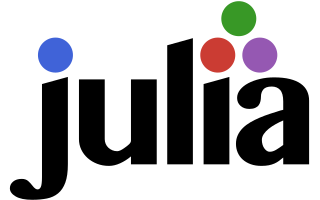

In [18]:
using Images
filename = Downloads.download("https://github.com/JuliaLang/julia-logo-graphics/blob/master/images/julia-logo-color.png?raw=true")

load(filename)

## Arrays
In Julia, vectors, matrices, etc are all just `Array`s:

In [19]:
x = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

You can push new items into a vector using `push!`: The `!` isn't anything special. People add it to function names as a convention when that function modifies something.

In [20]:
push!(x, 4)

4-element Vector{Int64}:
 1
 2
 3
 4

Just like MATLAB and Fortran, in Julia 1D arrays are column vectors by default. This is opposite from Python!

You can make matrices really easily:

In [21]:
A = [
    1 2 3
    4 5 6
    7 8 9
]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

Operators like `*`, `^2`, `sin()`, or `exp()` apply to their whole argument (unlike NumPy):

In [22]:
A^2

3×3 Matrix{Int64}:
  30   36   42
  66   81   96
 102  126  150

In [23]:
exp(A)

3×3 Matrix{Float64}:
 1.11891e6  1.37482e6  1.63072e6
 2.53388e6  3.11342e6  3.69295e6
 3.94886e6  4.85201e6  5.75517e6

In [24]:
A * [1, 2, 3]

3-element Vector{Int64}:
 14
 32
 50

## Broadcasting
If you want to apply an operation *element wise* you can prefix anything (**anything**) with a `.`:

In [25]:
A .* [1, 2, 3]

3×3 Matrix{Int64}:
  1   2   3
  8  10  12
 21  24  27

In [26]:
A.^2

3×3 Matrix{Int64}:
  1   4   9
 16  25  36
 49  64  81

In [27]:
sin.(A)

3×3 Matrix{Float64}:
  0.841471   0.909297   0.14112
 -0.756802  -0.958924  -0.279415
  0.656987   0.989358   0.412118

In [28]:
strs = [
    "A",
    "B",
    "C",
]
strs2 = ["a" "b"]
strs .* strs2

3×2 Matrix{String}:
 "Aa"  "Ab"
 "Ba"  "Bb"
 "Ca"  "Cb"

Ranges just store the start, step, and stop, but otherwise work just like any other Array:

In [29]:
1:5

1:5

In [30]:
y = vcat(1:5, 6:8)

8-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
 7
 8

In [31]:
@show length(A)
@show size(A)
@show eachindex(A);

length(A) = 9
size(A) = (3, 3)
eachindex(A) = Base.OneTo(9)


## Loops 
Loops are not bad! You can use for loops in your Julia programs as much as you want †, or you can use arrays if that makes more sense for a problem. You are free to choose!

†: If they're inside functions


In [32]:
for i in 1:10
    println(i^2)
end

1
4
9
16
25
36
49
64
81
100


## Symbolic Calculations
You can combine your calculations with symbolic variables, a bit like SymPy or Mathematica

In [33]:
using Symbolics
@variables u v w

expr = exp(u)^w / w

(exp(u)^w) / w

In [34]:
simplify(expr)

exp(u*w) / w

## Automatic Differentiation

Most Julia code can be differentiated just like any other mathematical expression using an autodiff library. Here, we'll use ForwardDiff.jl.

This is a super power: if you have a forward modelling code and you want to compare it to data, you can get not just the $\chi^2$ but also the gradient of that $\chi^2$ with respect to all your model parameters. This can make your modelling code even more efficient!


In [68]:
using ForwardDiff

model(x, μ, A, σ) = A * exp(-(x-μ)^2/σ)

xdat = 0:0.5:3
dat = sin.(xdat)

meansquare(d1, d2) = sqrt(mean((d1 .- d2).^2))

fit((μ, A, σ)) = meansquare(model.(xdat, μ, A, σ), dat)

fit((1, 0.1, 2))


0.6082812951104912

In [69]:
ForwardDiff.gradient(fit, [1, 0.1, 2])

3-element Vector{Float64}:
 -0.025605665549015857
 -0.6031166374068061
 -0.00732369724687677

All second order partial derviatives (the Hessian matrix):

In [75]:
ForwardDiff.hessian(fit, [1, 0.1, 2])

3×3 Matrix{Float64}:
  0.0333105   -0.276872    0.00476344
 -0.276872     0.204517   -0.0720698
  0.00476344  -0.0720698   0.00490133

Let's combine this with a symbolic variable for a mixed numerical/analytic expression

In [78]:
ForwardDiff.gradient(fit, [1, u, 2])[1]

(0.03866722378188934u*(0.2706705664732254u - 0.2822400161197344) + 0.06956838586250351u*(0.6493049347166995u - 1.1969442882079129) + 0.06303549304175682u*(1.764993805169191u - 1.994989973208109) + 0.08664723710180477u*(1.2130613194252668u - 1.8185948536513634) - 0.10510841176326924(u^2) - 0.06303549304175682u*(1.764993805169191u - 0.958851077208406)) / (2sqrt(0.05255420588163462(u^2) + (1//7)*((u - 0.8414709848078965)^2) + (1//7)*((0.1353352832366127u - 0.1411200080598672)^2) + (1//7)*((0.32465246735834974u - 0.5984721441039564)^2) + (1//7)*((0.6065306597126334u - 0.9092974268256817)^2) + (1//7)*((0.8824969025845955u - 0.479425538604203)^2) + (1//7)*((0.8824969025845955u - 0.9974949866040544)^2)))

## Uncertainty

In [84]:
using Measurements
a = 2 ± 1
b = 4 ± 2

a * b

8.0 ± 5.7

## Plotting

There are two great sets of plotting packages: `Plots.jl` and `Makie.jl`. Makie is a little slow to start, but makes for some really beautiful plots, so we'll use that today.

In [36]:
using WGLMakie

# CairoMakie: for nice PDF exports, figures for papers
# GLMakie   : for interactive or 3D plots in a separate window
# WGLMakie  : for quick interactive plots in Jupyter

In [37]:
lines(1:90, sind.(1:90), axis=(xlabel="x", ylabel="y"))

In [38]:
x = range(-π, π, length=100)
y = range(-π, π, length=100)
z = sinc.(sqrt.(x.^2 .+ y'.^2))

surface(x, y, z, colormap=:plasma)

In [39]:
fig = Figure(
    resolution=(800,800)
)

xx = π/2*randn(1000)
yy = π/2*randn(1000)

ax1 = Makie.Axis(fig[1,1], xlabel="x", ylabel="y")
scatter!(ax1, xx, yy, )

ax2 = Makie.Axis(fig[2,1], xlabel="x", ylabel="y")
h = contourf!(ax2, x, y, z)

Colorbar(fig[1:2, 2], h, label="Colorbar")


linkxaxes!(ax1, ax2)

fig

In [40]:
fig = Figure(
    resolution=(800,800)
)

xx = π/2*randn(1000)
yy = π/2*randn(1000)

ax1 = Makie.Axis(fig[1,1], xlabel="x", ylabel="y")
scatter!(ax1, xx, yy, )

ax2 = Makie.Axis(fig[2,1], xlabel="x", ylabel="y")
h = contourf!(ax2, x, y, z)

Colorbar(fig[1:2, 2], h, label="Colorbar")


linkxaxes!(ax1, ax2)

In [41]:
using WGLMakie
WGLMakie.activate!()